In [94]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [95]:
dataset_path = 'data.json'

In [96]:
with open(dataset_path, 'r') as fp:
    data = json.load(fp)

In [97]:
inputs = np.array(data['dfts'])
targets = np.array(data['peakFreqs'])

In [98]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.25)
X_train, X_validation, y_train, y_validation = train_test_split(inputs, targets, test_size=0.2)
test = X_train[0]

In [102]:
X_train.shape
input_shape=X_train[0].shape[0]
input_shape

232

232


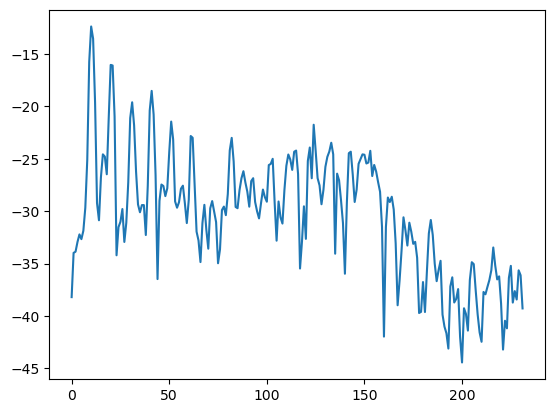

In [103]:
plt.plot(X_train[0])
print(len(X_train[0]))

In [104]:
model = keras.Sequential([
    keras.layers.LSTM(64, input_shape=input_shape, activation='tanh', return_sequences=True),
    
    keras.layers.LSTM(64, activation='tanh', return_sequences=True),
    
    keras.layers.LSTM(64, activation='tanh', return_sequences=True),
    
    keras.layers.LSTM(64, activation='tanh'),
    
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.3),
    
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.3),
    
    keras.layers.Dense(8, activation='linear')
])

TypeError: 'int' object is not iterable

In [87]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
             loss='mean_squared_error',
             metrics=['accuracy'])

In [88]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_51 (LSTM)              (None, 232, 64)           16896     
                                                                 
 lstm_52 (LSTM)              (None, 232, 64)           33024     
                                                                 
 lstm_53 (LSTM)              (None, 232, 64)           33024     
                                                                 
 lstm_54 (LSTM)              (None, 64)                33024     
                                                                 
 dense_64 (Dense)            (None, 64)                4160      
                                                                 
 dropout_39 (Dropout)        (None, 64)                0         
                                                                 
 dense_65 (Dense)            (None, 32)              

In [89]:
history = model.fit(X_train, y_train,
          validation_data=(X_validation, y_validation),
          epochs=50,
          batch_size=32)

Epoch 1/50
2/2 [==============================] - 6s 1s/step - loss: 907322.3125 - accuracy: 0.4250 - val_loss: 882890.6250 - val_accuracy: 0.0000e+00
Epoch 2/50
2/2 [==============================] - 1s 255ms/step - loss: 907316.6875 - accuracy: 0.3000 - val_loss: 882886.8750 - val_accuracy: 0.0000e+00
Epoch 3/50
2/2 [==============================] - 1s 280ms/step - loss: 907298.1875 - accuracy: 0.2250 - val_loss: 882882.8125 - val_accuracy: 0.0000e+00
Epoch 4/50
2/2 [==============================] - 1s 286ms/step - loss: 907299.6250 - accuracy: 0.2750 - val_loss: 882877.8125 - val_accuracy: 0.0000e+00
Epoch 5/50
2/2 [==============================] - 1s 256ms/step - loss: 907285.8125 - accuracy: 0.1750 - val_loss: 882873.0000 - val_accuracy: 0.0000e+00
Epoch 6/50
2/2 [==============================] - 1s 255ms/step - loss: 907283.1875 - accuracy: 0.2500 - val_loss: 882867.6250 - val_accuracy: 0.0000e+00
Epoch 7/50
2/2 [==============================] - 1s 253ms/step - loss: 907279.

In [90]:
prediction = model.predict(X_train[0])
X_train[0]

8/8 [==============================] - 1s 2ms/step


array([[-26.65673873],
       [-28.13642188],
       [-29.85744755],
       [-31.17761841],
       [-36.8399167 ],
       [-30.24480041],
       [-30.14066743],
       [-29.96401549],
       [-34.61587682],
       [-37.79360556],
       [-29.85061036],
       [-19.66345785],
       [-13.76985269],
       [-10.15017553],
       [-10.28871742],
       [-14.18895714],
       [-18.41559992],
       [-26.01031721],
       [-26.5327226 ],
       [-28.06439086],
       [-31.02191734],
       [-30.0145818 ],
       [-26.34219305],
       [-27.10080163],
       [-23.39666779],
       [-17.69829448],
       [-14.5013211 ],
       [-13.82524602],
       [-15.86936745],
       [-19.69449052],
       [-23.78429486],
       [-27.0266557 ],
       [-30.90804953],
       [-28.7467576 ],
       [-27.03868371],
       [-27.53069798],
       [-27.93854808],
       [-25.30130794],
       [-20.70828891],
       [-18.06507429],
       [-17.43820778],
       [-18.35411292],
       [-20.20399785],
       [-21

In [93]:
prediction

array([[ 0.00016132, -0.01153215, -0.01214537, ...,  0.04518922,
         0.00785171,  0.04562199],
       [ 0.00016702, -0.01155188, -0.01219337, ...,  0.04521928,
         0.00784828,  0.04566755],
       [ 0.00017376, -0.01156979, -0.01224066, ...,  0.04524506,
         0.00784313,  0.04571141],
       ...,
       [ 0.00019473, -0.01160298, -0.01234931, ...,  0.04528512,
         0.00782122,  0.04580788],
       [ 0.00018418, -0.01158958, -0.01230016, ...,  0.04527087,
         0.00783331,  0.04576501],
       [ 0.00018472, -0.01159042, -0.01230293, ...,  0.04527186,
         0.00783274,  0.04576746]], dtype=float32)